# OOI Broadband Hydrophones - file structure errors:

In [1]:
import obspy
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
# single 5 min file, LJ01C, 08-07-2023 T08:00:00
st = obspy.read('OO-HYEA1--YDH-2023-08-07T08:00:00.000000Z.mseed')

- all start time and end times for individual traces are the same
    - (with the exception of the first one)
- documentation on how obspy handles merging can be found [here](https://docs.obspy.org/packages/autogen/obspy.core.trace.Trace.html#obspy.core.trace.Trace.__add__). 
**Print the first 10 traces, and concatenate the data**

In [3]:
data = []
npts = 0
for k, tr in enumerate(st):
    npts += tr.stats.npts
    data.append(tr.data)
    
    if k > 10:
        continue

    print(tr)

print('.\n.\n.')

data = np.concatenate(data)

print(f'total npts: {npts}\t ({npts/64000/60} minutes)')

OO.HYEA1..YDH | 2023-08-07T08:00:00.000016Z - 2023-08-07T08:00:00.195235Z | 64000.0 Hz, 12495 samples
OO.HYEA1..YDH | 2023-08-07T08:00:00.000016Z - 2023-08-07T08:00:00.250000Z | 64000.0 Hz, 16000 samples
OO.HYEA1..YDH | 2023-08-07T08:00:00.000016Z - 2023-08-07T08:00:00.250000Z | 64000.0 Hz, 16000 samples
OO.HYEA1..YDH | 2023-08-07T08:00:00.000016Z - 2023-08-07T08:00:00.250000Z | 64000.0 Hz, 16000 samples
OO.HYEA1..YDH | 2023-08-07T08:00:00.000016Z - 2023-08-07T08:00:00.250000Z | 64000.0 Hz, 16000 samples
OO.HYEA1..YDH | 2023-08-07T08:00:00.000016Z - 2023-08-07T08:00:00.250000Z | 64000.0 Hz, 16000 samples
OO.HYEA1..YDH | 2023-08-07T08:00:00.000016Z - 2023-08-07T08:00:00.250000Z | 64000.0 Hz, 16000 samples
OO.HYEA1..YDH | 2023-08-07T08:00:00.000016Z - 2023-08-07T08:00:00.250000Z | 64000.0 Hz, 16000 samples
OO.HYEA1..YDH | 2023-08-07T08:00:00.000016Z - 2023-08-07T08:00:00.250000Z | 64000.0 Hz, 16000 samples
OO.HYEA1..YDH | 2023-08-07T08:00:00.000016Z - 2023-08-07T08:00:00.250000Z | 64000.

**trying to merge these traces with obspy doesn't work:**
- you get a signle trace with only 0.25 seconds
- this is the expected behavior from obspy (as described above)

In [4]:
st.merge()

1 Trace(s) in Stream:
OO.HYEA1..YDH | 2023-08-07T08:00:00.000016Z - 2023-08-07T08:00:00.250000Z | 64000.0 Hz, 16000 samples

## Trying to manually concatenate the data

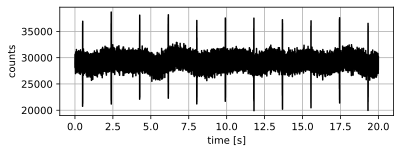

In [5]:
fig = plt.figure(figsize=(6,2))
t = np.arange(0,20,1/64000)
plt.plot(t, data[:len(t)], 'k')
plt.xlabel('time [s]')
plt.ylabel('counts')
plt.grid()

- manually concatenating the data appears to work, but if there is any missing data, the whole five minute segment is unusable.